<a href="https://colab.research.google.com/github/Laxmikurapati/Machine-learning-Projects/blob/main/Online_Fraud_transaction_Detection(Pickl.AI's%20Internship).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Data Preprocessing and Feature Engineering**

In [66]:
from collections import Counter
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split, GridSearchCV
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import pandas as pd
import numpy as np
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler


In [67]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [85]:
df=pd.read_csv("/content/drive/MyDrive/Dataset.csv")

In [86]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
0,1,PAYMENT,10039.64,C1231006920,170140.0,235296.36,M1979787155,0.0,0.0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19390.72,M2044282225,0.0,0.0,0
2,1,TRANSFER,290.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1
3,1,CASH_OUT,290.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0


In [87]:
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
dtype: int64

In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 10 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   step            1048575 non-null  int64  
 1   type            1048575 non-null  object 
 2   amount          1048575 non-null  float64
 3   nameOrig        1048575 non-null  object 
 4   oldbalanceOrg   1048575 non-null  float64
 5   newbalanceOrig  1048575 non-null  float64
 6   nameDest        1048575 non-null  object 
 7   oldbalanceDest  1048575 non-null  float64
 8   newbalanceDest  1048575 non-null  float64
 9   isFraud         1048575 non-null  int64  
dtypes: float64(5), int64(2), object(3)
memory usage: 80.0+ MB


In [89]:
df.shape

(1048575, 10)

In [90]:
df['step'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
       69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85,
       86, 87, 88, 89, 90, 91, 92, 93, 94, 95])

In [91]:
df['type'].unique()

array(['PAYMENT', 'TRANSFER', 'CASH_OUT', 'DEBIT', 'CASH_IN'],
      dtype=object)

In [92]:
from sklearn.preprocessing import LabelEncoder


# Create an instance of LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the categories to numerical values
df['type']= label_encoder.fit_transform(df['type'])


In [93]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
0,1,3,10039.64,C1231006920,170140.0,235296.36,M1979787155,0.0,0.0,0
1,1,3,1864.28,C1666544295,21249.0,19390.72,M2044282225,0.0,0.0,0
2,1,4,290.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1
3,1,1,290.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1
4,1,3,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0


In [94]:
import re
df['NameOrig'] = df['nameOrig'].apply(lambda x: int(re.search(r'\d+', x).group()))

# Drop the original 'transaction_id' column if you don't need it anymore
df.drop('nameOrig', axis=1, inplace=True)

df['NameDest'] = df['nameDest'].apply(lambda x: int(re.search(r'\d+', x).group()))

df.drop('nameDest', axis=1, inplace=True)

In [95]:
df.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,NameOrig,NameDest
0,1,3,10039.64,170140.0,235296.36,0.0,0.0,0,1231006920,1979787155
1,1,3,1864.28,21249.0,19390.72,0.0,0.0,0,1666544295,2044282225
2,1,4,290.00,181.0,0.00,0.0,0.0,1,1305486145,553264065
3,1,1,290.00,181.0,0.00,21182.0,0.0,1,840083671,38997010
4,1,3,11668.14,41554.0,29885.86,0.0,0.0,0,2048537720,1230701703


In [96]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 10 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   step            1048575 non-null  int64  
 1   type            1048575 non-null  int64  
 2   amount          1048575 non-null  float64
 3   oldbalanceOrg   1048575 non-null  float64
 4   newbalanceOrig  1048575 non-null  float64
 5   oldbalanceDest  1048575 non-null  float64
 6   newbalanceDest  1048575 non-null  float64
 7   isFraud         1048575 non-null  int64  
 8   NameOrig        1048575 non-null  int64  
 9   NameDest        1048575 non-null  int64  
dtypes: float64(5), int64(5)
memory usage: 80.0 MB


In [17]:
df.columns


Index(['step', 'type', 'amount', 'oldbalanceOrg', 'newbalanceOrig',
       'oldbalanceDest', 'newbalanceDest', 'isFraud', 'NameOrig', 'NameDest'],
      dtype='object')

In [18]:
numerical_features = [feature for feature in df.columns if df[feature].dtypes != 'O']
print('Number of numerical variables: ', len(numerical_features))
numerical_features

Number of numerical variables:  10


['step',
 'type',
 'amount',
 'oldbalanceOrg',
 'newbalanceOrig',
 'oldbalanceDest',
 'newbalanceDest',
 'isFraud',
 'NameOrig',
 'NameDest']

In [19]:
discrete_feature=[feature for feature in numerical_features if len(df[feature].unique())<25 and feature]
print("Discrete Variables Count: {}".format(len(discrete_feature)))
discrete_feature

Discrete Variables Count: 2


['type', 'isFraud']

In [20]:
continuous_feature=[feature for feature in numerical_features if feature not in discrete_feature+['NameDest','NameOrig','step']]
print("Continuous feature Count {}".format(len(continuous_feature)))

Continuous feature Count 5


In [21]:
continuous_feature

['amount',
 'oldbalanceOrg',
 'newbalanceOrig',
 'oldbalanceDest',
 'newbalanceDest']

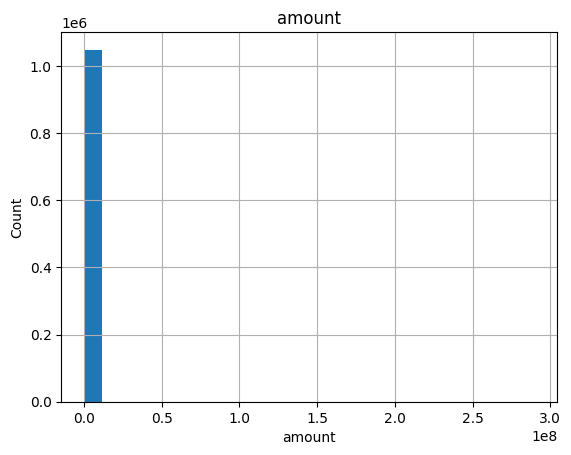

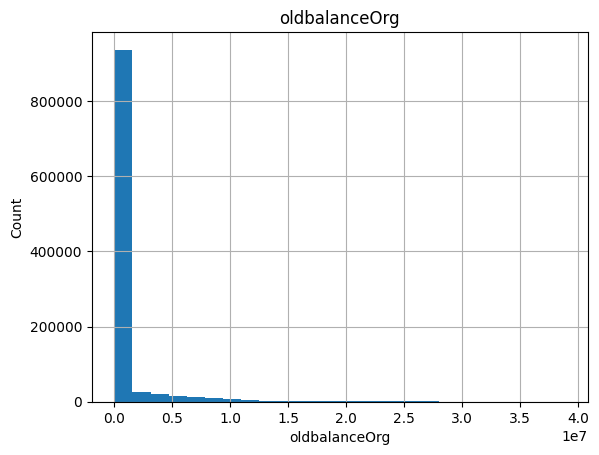

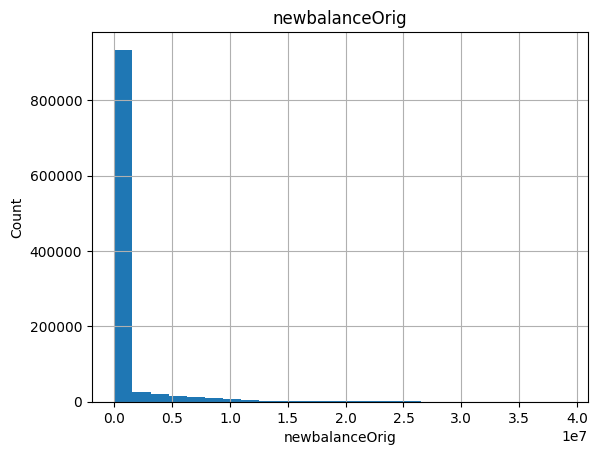

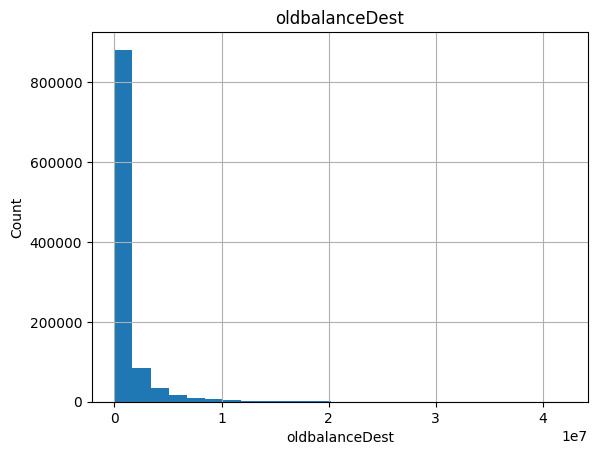

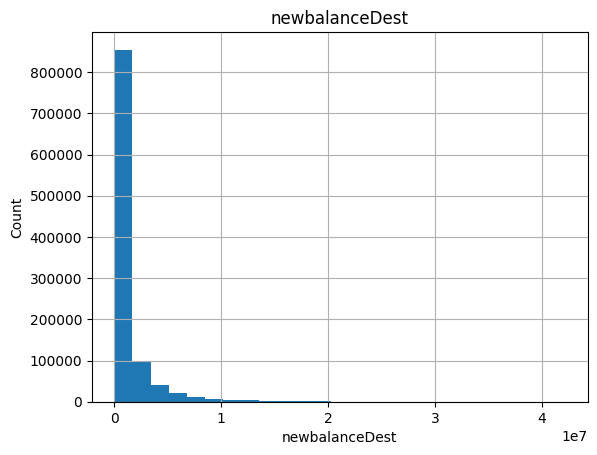

In [22]:
import matplotlib.pyplot as plt

for feature in continuous_feature:

    df[feature].hist(bins=25)
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.show()


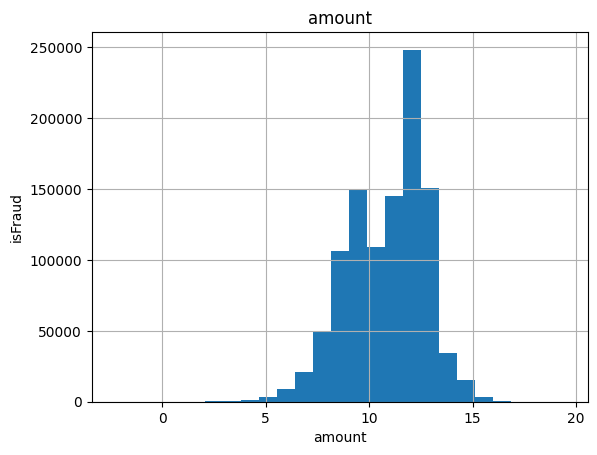

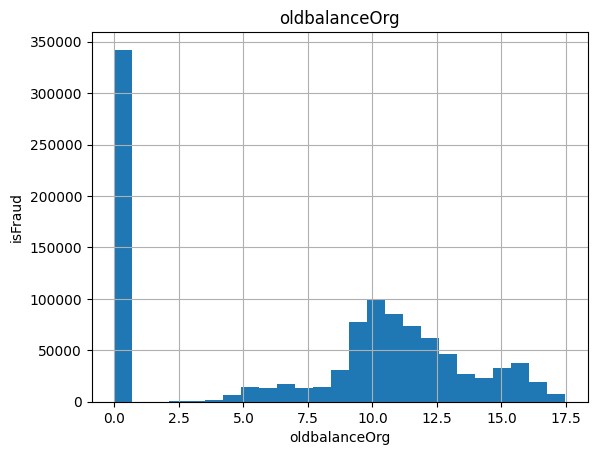

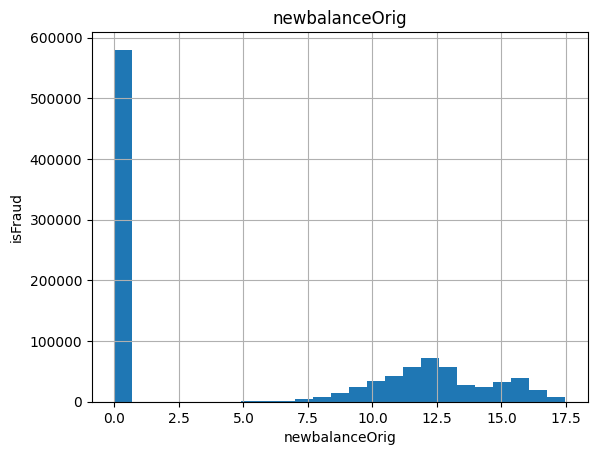

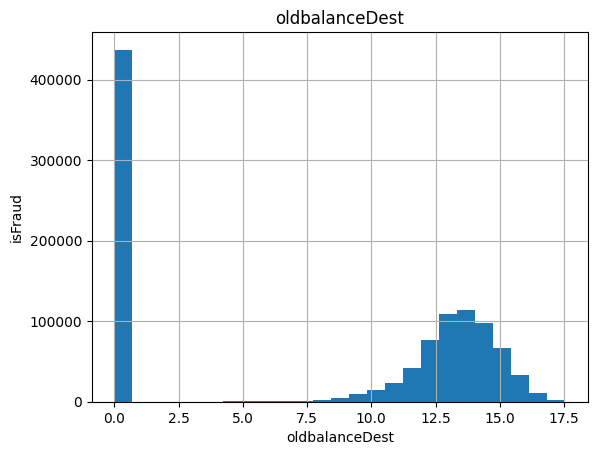

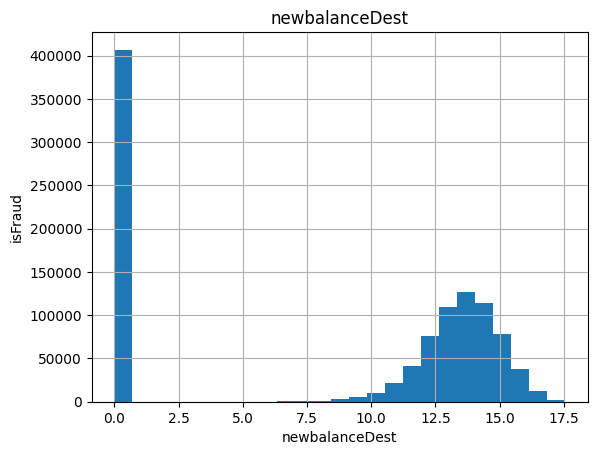

In [23]:
for feature in continuous_feature:
    if 0 in df[feature].unique():  ##becuase log of zero is undefined as we are taking logarithm of the value
        # Handle zero values by adding a small constant (e.g., 1) to all data points
        df[feature] = np.log(df[feature] + 1)
    else:
        df[feature]=np.log(df[feature])

    df[feature].hist(bins=25)
    plt.xlabel(feature)
    plt.ylabel('isFraud')
    plt.title(feature)
    plt.show()


/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


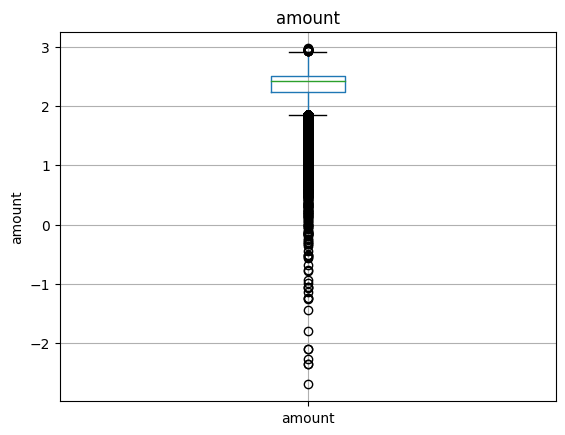

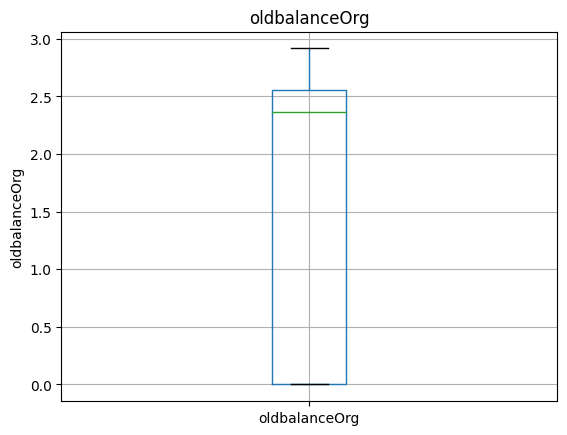

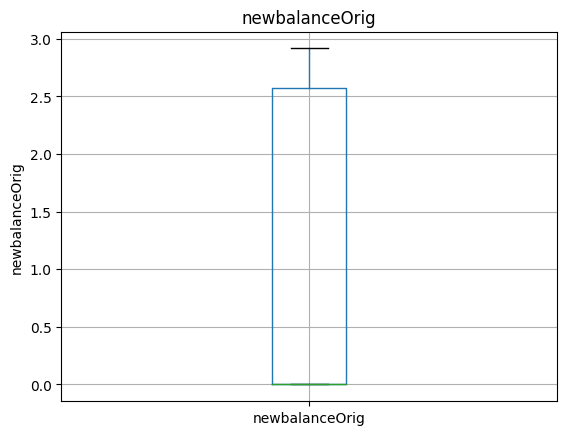

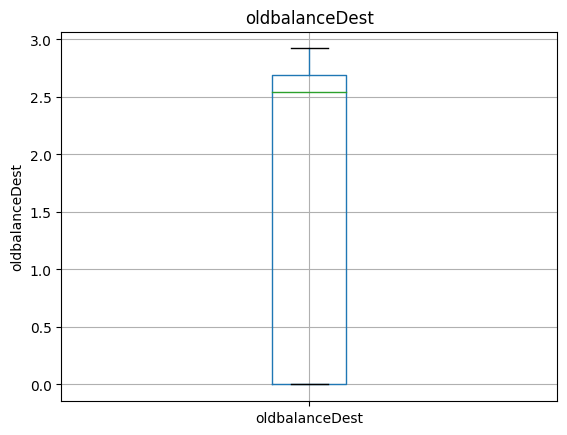

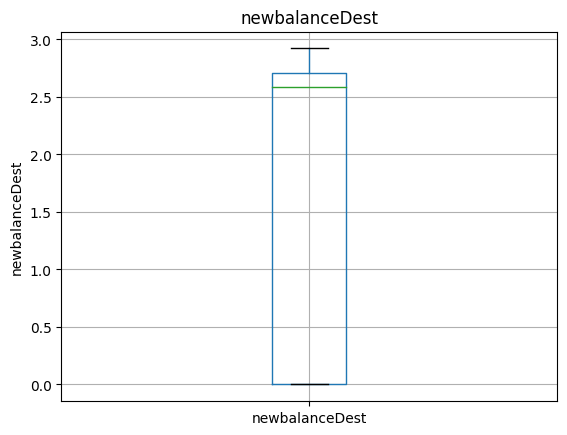

In [24]:
for feature in continuous_feature:

    if 0 in df[feature].unique():
        df[feature]=df[feature]+1

    df[feature]=np.log(df[feature])
    df.boxplot(column=feature)
    plt.ylabel(feature)
    plt.title(feature)
    plt.show()

In [25]:
df.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,NameOrig,NameDest
0,1,3,2.220756,2.568358,2.592909,0.000000,0.0,0,1231006920,1979787155
1,1,3,2.018979,2.394627,2.386246,0.000000,0.0,0,1666544295,2044282225
2,1,4,1.735168,1.825195,0.000000,0.000000,0.0,1,1305486145,553264065
3,1,1,1.735168,1.825195,0.000000,2.394339,0.0,1,840083671,38997010
4,1,3,2.236938,2.453998,2.425261,0.000000,0.0,0,2048537720,1230701703


In [26]:
df['amount'].describe()

count    1.048554e+06
mean     2.369478e+00
std      1.924649e-01
min     -2.693280e+00
25%      2.243796e+00
50%      2.424399e+00
75%      2.511424e+00
max      2.969666e+00
Name: amount, dtype: float64

#**Handling Outliers**

<Axes: >

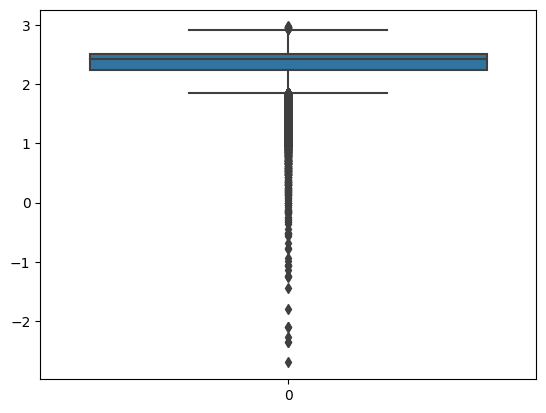

In [27]:
import seaborn as sns
sns.boxplot(df['amount'])

In [28]:
# Finding the IQR
percentile25 = df['amount'].quantile(0.25)
percentile75 = df['amount'].quantile(0.75)

In [29]:
percentile75

2.5114237053198263

In [30]:
iqr = percentile75 - percentile25

In [31]:
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr

In [32]:
print("Upper limit",upper_limit)
print("Lower limit",lower_limit)


Upper limit 2.9128659025807075
Lower limit 1.8423533765516908


## **1.Trimming**

In [33]:
#Trimming
new_df = df[df['amount'] < upper_limit]

In [34]:
new_df

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,NameOrig,NameDest
0,1,3,2.220756,2.568358,2.592909,0.000000,0.000000,0,1231006920,1979787155
1,1,3,2.018979,2.394627,2.386246,0.000000,0.000000,0,1666544295,2044282225
2,1,4,1.735168,1.825195,0.000000,0.000000,0.000000,1,1305486145,553264065
3,1,1,1.735168,1.825195,0.000000,2.394339,0.000000,1,840083671,38997010
4,1,3,2.236938,2.453998,2.425261,0.000000,0.000000,0,2048537720,1230701703
...,...,...,...,...,...,...,...,...,...,...
1048570,95,1,2.467656,2.644836,2.621605,2.645502,2.662526,0,1179511630,435674507
1048571,95,3,2.219425,2.518794,2.509405,0.000000,0.000000,0,1956161225,668364942
1048572,95,3,2.257249,2.391550,2.278803,0.000000,0.000000,0,2037964975,1355182933
1048573,95,3,2.220544,2.518847,2.509362,0.000000,0.000000,0,1633237354,1964992463


<ipython-input-35-9db0707e1bf7>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['amount'])
<ipython-input-35-9db0707e1bf7>:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_df['amount'])


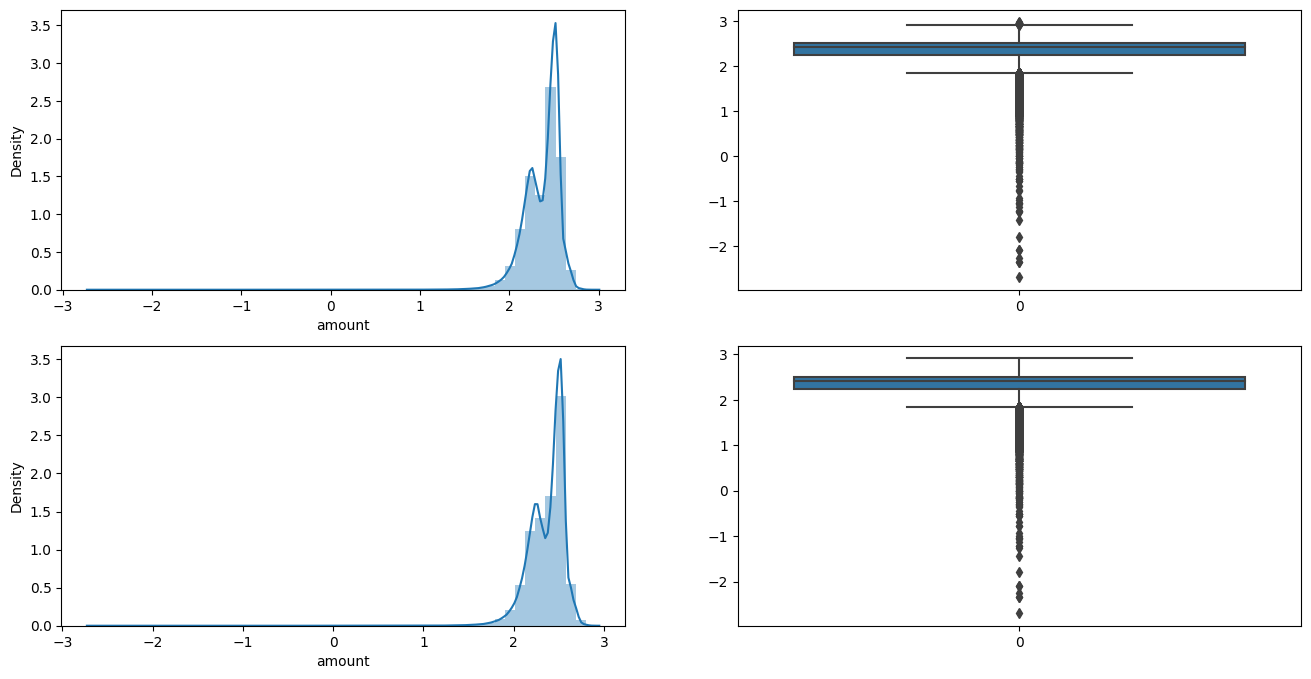

In [35]:
# Comparing

plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(df['amount'])
plt.subplot(2,2,2)
sns.boxplot(df['amount'])
plt.subplot(2,2,3)
sns.distplot(new_df['amount'])
plt.subplot(2,2,4)
sns.boxplot(new_df['amount'])
plt.show()

##**2.Capping**

In [36]:
#Capping

new_df_cap = df.copy()

new_df_cap['amount'] = np.where(
    new_df_cap['amount'] > upper_limit,
    upper_limit,
    np.where(
        new_df_cap['amount'] < lower_limit,
        lower_limit,
        new_df_cap['amount']
    )
)

<ipython-input-37-80231f7941bf>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['amount'])
<ipython-input-37-80231f7941bf>:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_df_cap['amount'])


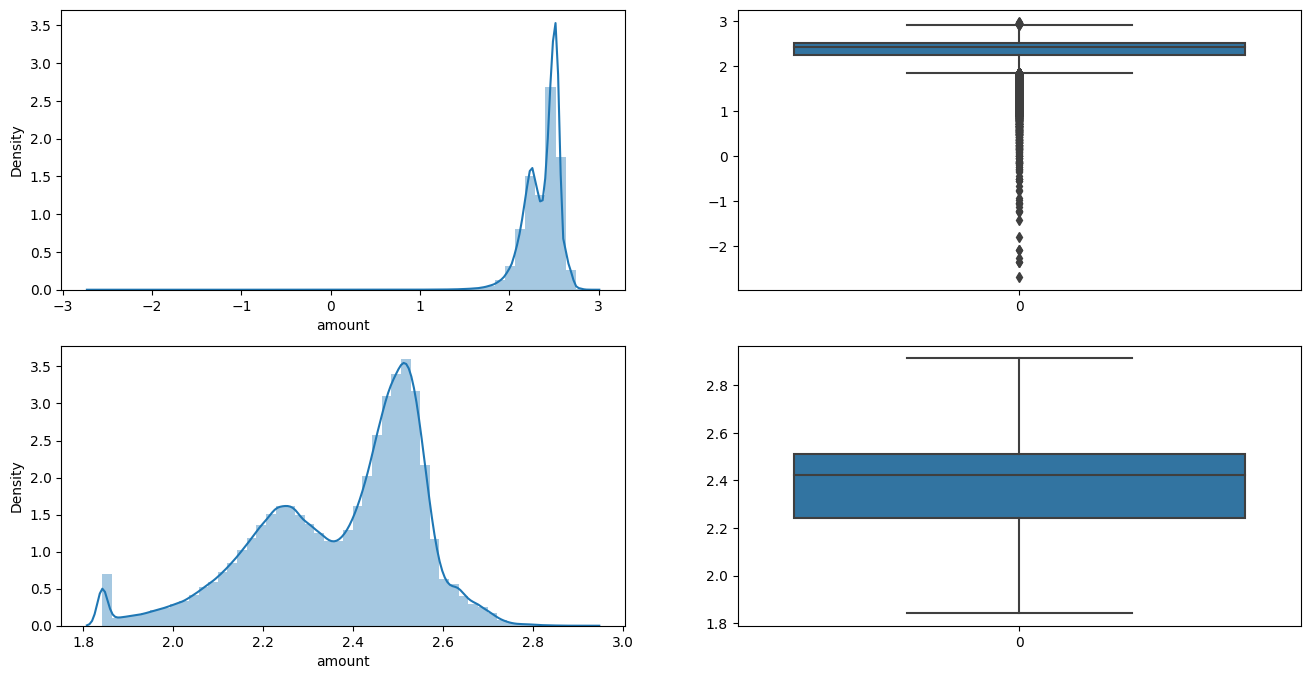

In [37]:
# Comparing

plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(df['amount'])

plt.subplot(2,2,2)
sns.boxplot(df['amount'])

plt.subplot(2,2,3)
sns.distplot(new_df_cap['amount'])

plt.subplot(2,2,4)
sns.boxplot(new_df_cap['amount'])

plt.show()


In [38]:
data=new_df_cap

In [39]:
data.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,NameOrig,NameDest
0,1,3,2.220756,2.568358,2.592909,0.000000,0.0,0,1231006920,1979787155
1,1,3,2.018979,2.394627,2.386246,0.000000,0.0,0,1666544295,2044282225
2,1,4,1.842353,1.825195,0.000000,0.000000,0.0,1,1305486145,553264065
3,1,1,1.842353,1.825195,0.000000,2.394339,0.0,1,840083671,38997010
4,1,3,2.236938,2.453998,2.425261,0.000000,0.0,0,2048537720,1230701703


In [40]:
data['isFraud'].value_counts()


0    1047433
1       1142
Name: isFraud, dtype: int64

In [41]:
data.dropna(inplace=True)

In [42]:
data.isnull().sum()

step              0
type              0
amount            0
oldbalanceOrg     0
newbalanceOrig    0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
NameOrig          0
NameDest          0
dtype: int64

In [43]:
X=data.drop('isFraud',axis=1)
y=data['isFraud']

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [47]:
rf = RandomForestClassifier(random_state=42)

In [49]:
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [50]:
# Make predictions using the best model
y_pred = rf.predict(X_test)

# Evaluate the model
print("Best RandomForest performance:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1-score:", f1_score(y_test, y_pred))

Best RandomForest performance:
Accuracy: 0.9997615770249263
Precision: 0.9788732394366197
Recall: 0.8011527377521613
F1-score: 0.8811410459587955


#**Method-1 : Under Sampling**




In [55]:
# 1. Under-sampling
under_sampler = RandomUnderSampler(sampling_strategy=0.5, random_state=42)
X_train_under, y_train_under = under_sampler.fit_resample(X_train, y_train)
print("Under-sampled class distribution:", Counter(y_train_under))

Under-sampled class distribution: Counter({0: 1590, 1: 795})


In [56]:
rf.fit(X_train_under, y_train_under)

RandomForestClassifier(random_state=42)

In [57]:
# Make predictions using the best model
y_pred = rf.predict(X_test)

# Evaluate the model
print("Best RandomForest performance:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1-score:", f1_score(y_test, y_pred))

Best RandomForest performance:
Accuracy: 0.9892868609866896
Precision: 0.09049038201029531
Recall: 0.962536023054755
F1-score: 0.1654284299157999


#**Method- 2: Oversampling**

In [58]:
# 2. Over-sampling
over_sampler = RandomOverSampler(sampling_strategy=0.5, random_state=42)
X_train_over, y_train_over = over_sampler.fit_resample(X_train, y_train)
print("Over-sampled class distribution:", Counter(y_train_over))

Over-sampled class distribution: Counter({0: 733192, 1: 366596})


In [60]:
rf.fit(X_train_over, y_train_over)

RandomForestClassifier(random_state=42)

In [61]:
# Make predictions using the best model
y_pred = rf.predict(X_test)

# Evaluate the model
print("Best RandomForest performance:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1-score:", f1_score(y_test, y_pred))

Best RandomForest performance:
Accuracy: 0.9997806508629322
Precision: 0.9727891156462585
Recall: 0.8242074927953891
F1-score: 0.8923556942277691


#**Method-3 : SMOTE**

In [62]:
!pip install imbalanced-learn

In [63]:
# 3. SMOTE
smote = SMOTE(sampling_strategy=0.5, random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)
print("SMOTE-sampled class distribution:", Counter(y_train_smote))

SMOTE-sampled class distribution: Counter({0: 733192, 1: 366596})


In [64]:
rf.fit(X_train_smote, y_train_smote)

RandomForestClassifier(random_state=42)

In [65]:
# Make predictions using the best model
y_pred = rf.predict(X_test)

# Evaluate the model
print("Best RandomForest performance:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1-score:", f1_score(y_test, y_pred))

Best RandomForest performance:
Accuracy: 0.9992497623717682
Precision: 0.6134969325153374
Recall: 0.8645533141210374
F1-score: 0.7177033492822966
